In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import LabelEncoder

In [21]:
# Load dataset
data_train  = pd.read_csv("Dataset/train.csv")
data_test   = pd.read_csv("Dataset/test.csv")
data_train  = data_train[["PassengerId","Survived","Pclass","Name",
                          "Sex","Age","SibSp","Parch",
                          "Ticket","Fare","Embarked"]]
data_test   = data_test[["PassengerId","Pclass","Name",
                          "Sex","Age","SibSp","Parch",
                          "Ticket","Fare","Embarked"]]
data_train.fillna(0)
data_test.fillna(0)

PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Embarked  
0      male  34.5      0      0              330911    7.8292        Q  
1    female  47.0      1      0              363272    7.0000        S  
2      male  62.0      0      0              240276    9.6875        Q  
3      male  27.0      0      0              315154    8.6625        S  
4    female  22.0      1      1             3101298   12.2875        S  
..      ...   ...    ...    ...                 ...       ...      ...  
413    male   0.0      0      0           A.5. 3236    8.0500        S  
414  female  39.0      0      0            PC 17758  108.9000        C  
415    male  38.5      0      0  SOTON/O.Q. 3101262    7.2500        S  
416    male   0.0      0      0              359309    8.0500        S  
417    male   0.0      1      1                2668   22.3583        C  

[418 rows x 10 columns]

In [22]:
x_train     = data_train[["Sex","Age","SibSp","Parch",
                          "Fare","Embarked"]].values
y_train     = data_train[["Survived"]].values
row,coloumn = x_train.shape

In [23]:
# Encoding
# x
for i in range(coloumn):
    x_train[: , i] = LabelEncoder().fit_transform(x_train[:,i])
# y
y_train            = LabelEncoder().fit_transform(y_train)

C:\Python3_7\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [24]:
# Normalize X
maxx = []
minn = []
for i in range(coloumn):
    maxx.append(np.max(x_train[:,i]))
    minn.append(np.min(x_train[:,i]))
print(maxx)
print(minn)

[1, 88, 6, 6, 247, 3]
[0, 0, 0, 0, 0, 0]


In [25]:
# Normalize X
for i in range(coloumn):  
    for j in range(row):
        x_train[j , i] = (x_train[j , i]- minn[i])/(maxx[i]-minn[i])

In [26]:
x_train

array([[1.0, 0.3181818181818182, 0.16666666666666666, 0.0,
        0.0728744939271255, 0.6666666666666666],
       [0.0, 0.5795454545454546, 0.16666666666666666, 0.0,
        0.8380566801619433, 0.0],
       [0.0, 0.38636363636363635, 0.0, 0.0, 0.1659919028340081,
        0.6666666666666666],
       ...,
       [0.0, 1.0, 0.16666666666666666, 0.3333333333333333,
        0.5303643724696356, 0.6666666666666666],
       [1.0, 0.38636363636363635, 0.0, 0.0, 0.6194331983805668, 0.0],
       [1.0, 0.4772727272727273, 0.0, 0.0, 0.1214574898785425,
        0.3333333333333333]], dtype=object)

In [27]:
# Function
def sigmoid(x):
  return 1/(1+np.exp(-x))
sig = np.vectorize(sigmoid)

In [28]:
#-------------------------------------
#- inisiasi

input       = x_train
target      = y_train
num_input   = 6
net_hidden1 = 12
net_hidden2 = 24
num_output  = 1

#Input-->Hidden Layer1
w_hidden1 = np.random.uniform(low=-0.5, high=0.5, size=(num_input,net_hidden1))
b_hidden1 = np.random.uniform(low=-0.5, high=0.5, size=(net_hidden1))
#Hidden Layer1-->Hidden Layer2
w_hidden2 = np.random.uniform(low=-0.5, high=0.5, size=(net_hidden1,net_hidden2))
b_hidden2 = np.random.uniform(low=-0.5, high=0.5, size=(net_hidden2))
#Hidden Layer2-->Output
w_output = np.random.uniform(low=-0.5, high=0.5, size=(net_hidden2,num_output))
b_output = np.random.uniform(low=-0.5, high=0.5, size=(num_output))

# Loss dan Akurasi
loss_values = []
acc_values  = []

lr     = 0.5
epochs = 1000

In [29]:
print(w_hidden1.shape)
print(w_hidden2.shape)
print(w_output.shape)

(6, 12)
(12, 24)
(24, 1)


In [30]:
list_w_hidden1 = []
list_w_hidden2 = []
list_w_output  = []
list_b_hidden1 = []
list_b_hidden2 = []
list_b_output  = []

for epoch in range(epochs):
    MSE = 0
    new_target = np.zeros(len(target))
    for idx, inp in enumerate(input):
        # A. Feedforward
        # Hidden Layer1
        o_hidden1 = np.matmul(input[idx], w_hidden1) + b_hidden1
        o_hidden1 = sig(o_hidden1)
        # Hidden Layer2
        o_hidden2 = np.matmul(o_hidden1, w_hidden2) + b_hidden2
        o_hidden2 = sig(o_hidden2)
        # Outpur Layer
        o_output  = np.matmul(o_hidden2, w_output) + b_output
        o_output  = sig(o_output)
        # Menghitung Error
        error           = target[idx] - o_output
        MSE             = MSE + (error*error)
        new_target[idx] = o_output.round()
        # Error hidden2->output
        eh2             = error @ w_output.T
        # Error hidden1->output 
        eh1             = eh2   @ w_hidden2.T
        # B. Backpropagation
        # Outpur Layer
        w_output = w_output + (lr * ((error * o_output * (1 - o_output))* o_hidden2[np.newaxis].T))
        b_output = b_output + (lr * ((error * o_output * (1 - o_output))))
        # Hidden Layer2
        w_hidden2 = w_hidden2 + (lr * (eh2 * o_hidden2 * (1 - o_hidden2))* o_hidden1[np.newaxis].T)
        b_hidden2 = b_hidden2 + (lr * (eh2 * o_hidden2 * (1 - o_hidden2)))
        # Hidden Layer1
        w_hidden1 = w_hidden1 + (lr * (eh1 * o_hidden1 * (1 - o_hidden1))* input[idx][np.newaxis].T)
        b_hidden1 = b_hidden1 + (lr * (eh1 * o_hidden1 * (1 - o_hidden1)))
        
    MSE = MSE/len(target)
    acc = 1 - (np.sum(np.absolute(target-new_target))/len(target))
    loss_values.append(MSE)
    acc_values.append(acc)
    list_w_hidden1.append(w_hidden1)
    list_w_hidden2.append(w_hidden2)
    list_w_output.append(w_output)
    list_b_hidden1.append(b_hidden1)
    list_b_hidden2.append(b_hidden2)
    list_b_output.append(b_output)
    print("epoch : ",epoch," | error : ",MSE," | acc : ",acc)

acc_max   = max(acc_values)
index_max = acc_values.index(acc_max)
w_hidden1 = list_w_hidden1[index_max]
w_hidden2 = list_w_hidden2[index_max]
w_output  = list_w_output[index_max]
b_hidden1 = list_b_hidden1[index_max]
b_hidden2 = list_b_hidden2[index_max]
b_output  = list_b_output[index_max]

epoch :  0  | error :  [0.19114736]  | acc :  0.7272727272727273
epoch :  1  | error :  [0.16387341]  | acc :  0.7789001122334456
epoch :  2  | error :  [0.15986147]  | acc :  0.7833894500561167
epoch :  3  | error :  [0.15792565]  | acc :  0.7833894500561167
epoch :  4  | error :  [0.15656233]  | acc :  0.7822671156004489
epoch :  5  | error :  [0.15562233]  | acc :  0.7845117845117845
epoch :  6  | error :  [0.15461914]  | acc :  0.7901234567901234
epoch :  7  | error :  [0.15348291]  | acc :  0.792368125701459
epoch :  8  | error :  [0.15220095]  | acc :  0.792368125701459
epoch :  9  | error :  [0.15098416]  | acc :  0.7890011223344556
epoch :  10  | error :  [0.1499382]  | acc :  0.7901234567901234
epoch :  11  | error :  [0.14911335]  | acc :  0.7934904601571269
epoch :  12  | error :  [0.14873671]  | acc :  0.797979797979798
epoch :  13  | error :  [0.14810317]  | acc :  0.8013468013468014
epoch :  14  | error :  [0.1473809]  | acc :  0.8002244668911336
epoch :  15  | error :  [

epoch :  125  | error :  [0.13406037]  | acc :  0.8080808080808081
epoch :  126  | error :  [0.13448259]  | acc :  0.8047138047138047
epoch :  127  | error :  [0.13329251]  | acc :  0.8069584736251403
epoch :  128  | error :  [0.13418767]  | acc :  0.8035914702581369
epoch :  129  | error :  [0.13346485]  | acc :  0.8080808080808081
epoch :  130  | error :  [0.13530073]  | acc :  0.8035914702581369
epoch :  131  | error :  [0.13508073]  | acc :  0.8035914702581369
epoch :  132  | error :  [0.13441001]  | acc :  0.8024691358024691
epoch :  133  | error :  [0.13434458]  | acc :  0.8047138047138047
epoch :  134  | error :  [0.13427607]  | acc :  0.8069584736251403
epoch :  135  | error :  [0.13319391]  | acc :  0.8103254769921436
epoch :  136  | error :  [0.1356436]  | acc :  0.8047138047138047
epoch :  137  | error :  [0.13560121]  | acc :  0.8069584736251403
epoch :  138  | error :  [0.13615266]  | acc :  0.8069584736251403
epoch :  139  | error :  [0.13540549]  | acc :  0.8002244668911

epoch :  248  | error :  [0.13131694]  | acc :  0.8181818181818181
epoch :  249  | error :  [0.13248732]  | acc :  0.8080808080808081
epoch :  250  | error :  [0.13229943]  | acc :  0.8080808080808081
epoch :  251  | error :  [0.13009068]  | acc :  0.819304152637486
epoch :  252  | error :  [0.1309017]  | acc :  0.8204264870931538
epoch :  253  | error :  [0.1299781]  | acc :  0.8226711560044894
epoch :  254  | error :  [0.12830147]  | acc :  0.8215488215488216
epoch :  255  | error :  [0.12920946]  | acc :  0.8204264870931538
epoch :  256  | error :  [0.13105504]  | acc :  0.8170594837261504
epoch :  257  | error :  [0.13055505]  | acc :  0.8204264870931538
epoch :  258  | error :  [0.13066279]  | acc :  0.8181818181818181
epoch :  259  | error :  [0.13177529]  | acc :  0.8148148148148149
epoch :  260  | error :  [0.13152609]  | acc :  0.8148148148148149
epoch :  261  | error :  [0.1291991]  | acc :  0.8237934904601572
epoch :  262  | error :  [0.13052374]  | acc :  0.8226711560044894

epoch :  371  | error :  [0.13723922]  | acc :  0.8069584736251403
epoch :  372  | error :  [0.13693507]  | acc :  0.8024691358024691
epoch :  373  | error :  [0.13747786]  | acc :  0.8125701459034792
epoch :  374  | error :  [0.13641021]  | acc :  0.8035914702581369
epoch :  375  | error :  [0.13664575]  | acc :  0.8047138047138047
epoch :  376  | error :  [0.13574908]  | acc :  0.8013468013468014
epoch :  377  | error :  [0.13346338]  | acc :  0.797979797979798
epoch :  378  | error :  [0.13448687]  | acc :  0.8013468013468014
epoch :  379  | error :  [0.13407624]  | acc :  0.8058361391694725
epoch :  380  | error :  [0.13356945]  | acc :  0.8058361391694725
epoch :  381  | error :  [0.1329338]  | acc :  0.8058361391694725
epoch :  382  | error :  [0.1328129]  | acc :  0.8069584736251403
epoch :  383  | error :  [0.13242995]  | acc :  0.8080808080808081
epoch :  384  | error :  [0.13354467]  | acc :  0.8114478114478114
epoch :  385  | error :  [0.13313839]  | acc :  0.813692480359147

epoch :  494  | error :  [0.13277006]  | acc :  0.797979797979798
epoch :  495  | error :  [0.13358214]  | acc :  0.797979797979798
epoch :  496  | error :  [0.13283627]  | acc :  0.7968574635241302
epoch :  497  | error :  [0.1335777]  | acc :  0.7991021324354658
epoch :  498  | error :  [0.13207202]  | acc :  0.7991021324354658
epoch :  499  | error :  [0.1315725]  | acc :  0.8047138047138047
epoch :  500  | error :  [0.13229442]  | acc :  0.797979797979798
epoch :  501  | error :  [0.13296993]  | acc :  0.8035914702581369
epoch :  502  | error :  [0.13191368]  | acc :  0.8047138047138047
epoch :  503  | error :  [0.13258215]  | acc :  0.8069584736251403
epoch :  504  | error :  [0.13293136]  | acc :  0.8047138047138047
epoch :  505  | error :  [0.13228368]  | acc :  0.8080808080808081
epoch :  506  | error :  [0.13222112]  | acc :  0.8069584736251403
epoch :  507  | error :  [0.13261223]  | acc :  0.8092031425364759
epoch :  508  | error :  [0.13321378]  | acc :  0.8047138047138047


epoch :  617  | error :  [0.13483501]  | acc :  0.8024691358024691
epoch :  618  | error :  [0.13612197]  | acc :  0.8002244668911336
epoch :  619  | error :  [0.13554604]  | acc :  0.8002244668911336
epoch :  620  | error :  [0.13474513]  | acc :  0.7957351290684624
epoch :  621  | error :  [0.13579337]  | acc :  0.8047138047138047
epoch :  622  | error :  [0.13675401]  | acc :  0.8013468013468014
epoch :  623  | error :  [0.13335939]  | acc :  0.8013468013468014
epoch :  624  | error :  [0.13553254]  | acc :  0.8013468013468014
epoch :  625  | error :  [0.13503881]  | acc :  0.8058361391694725
epoch :  626  | error :  [0.1347807]  | acc :  0.8080808080808081
epoch :  627  | error :  [0.13380716]  | acc :  0.8092031425364759
epoch :  628  | error :  [0.13558005]  | acc :  0.8114478114478114
epoch :  629  | error :  [0.13453697]  | acc :  0.8047138047138047
epoch :  630  | error :  [0.13476885]  | acc :  0.8024691358024691
epoch :  631  | error :  [0.13396553]  | acc :  0.7991021324354

epoch :  740  | error :  [0.13257998]  | acc :  0.8035914702581369
epoch :  741  | error :  [0.13125383]  | acc :  0.8024691358024691
epoch :  742  | error :  [0.13001587]  | acc :  0.8080808080808081
epoch :  743  | error :  [0.13062807]  | acc :  0.8035914702581369
epoch :  744  | error :  [0.13124153]  | acc :  0.8013468013468014
epoch :  745  | error :  [0.13235499]  | acc :  0.8002244668911336
epoch :  746  | error :  [0.13067515]  | acc :  0.8002244668911336
epoch :  747  | error :  [0.12995557]  | acc :  0.8013468013468014
epoch :  748  | error :  [0.13139661]  | acc :  0.7968574635241302
epoch :  749  | error :  [0.13282031]  | acc :  0.7968574635241302
epoch :  750  | error :  [0.13077951]  | acc :  0.8024691358024691
epoch :  751  | error :  [0.13311394]  | acc :  0.7991021324354658
epoch :  752  | error :  [0.13061236]  | acc :  0.8035914702581369
epoch :  753  | error :  [0.1317655]  | acc :  0.8080808080808081
epoch :  754  | error :  [0.13220405]  | acc :  0.7991021324354

epoch :  863  | error :  [0.13246277]  | acc :  0.8013468013468014
epoch :  864  | error :  [0.13285786]  | acc :  0.8013468013468014
epoch :  865  | error :  [0.13301783]  | acc :  0.7957351290684624
epoch :  866  | error :  [0.13359899]  | acc :  0.7968574635241302
epoch :  867  | error :  [0.1331826]  | acc :  0.8013468013468014
epoch :  868  | error :  [0.13355561]  | acc :  0.8002244668911336
epoch :  869  | error :  [0.13334079]  | acc :  0.7991021324354658
epoch :  870  | error :  [0.13273984]  | acc :  0.8002244668911336
epoch :  871  | error :  [0.13343563]  | acc :  0.8013468013468014
epoch :  872  | error :  [0.13288237]  | acc :  0.8002244668911336
epoch :  873  | error :  [0.13457161]  | acc :  0.7934904601571269
epoch :  874  | error :  [0.13368329]  | acc :  0.7991021324354658
epoch :  875  | error :  [0.13581187]  | acc :  0.7912457912457913
epoch :  876  | error :  [0.13673963]  | acc :  0.792368125701459
epoch :  877  | error :  [0.13727596]  | acc :  0.79461279461279

epoch :  986  | error :  [0.13730654]  | acc :  0.7968574635241302
epoch :  987  | error :  [0.13574944]  | acc :  0.8058361391694725
epoch :  988  | error :  [0.13420833]  | acc :  0.8125701459034792
epoch :  989  | error :  [0.13790918]  | acc :  0.7968574635241302
epoch :  990  | error :  [0.13698559]  | acc :  0.8047138047138047
epoch :  991  | error :  [0.13471308]  | acc :  0.8069584736251403
epoch :  992  | error :  [0.13810394]  | acc :  0.7968574635241302
epoch :  993  | error :  [0.13538265]  | acc :  0.8013468013468014
epoch :  994  | error :  [0.13397347]  | acc :  0.8035914702581369
epoch :  995  | error :  [0.13357354]  | acc :  0.8058361391694725
epoch :  996  | error :  [0.13423861]  | acc :  0.8013468013468014
epoch :  997  | error :  [0.13272699]  | acc :  0.8047138047138047
epoch :  998  | error :  [0.13038112]  | acc :  0.8125701459034792
epoch :  999  | error :  [0.1322373]  | acc :  0.8024691358024691


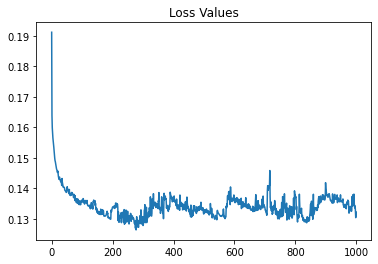

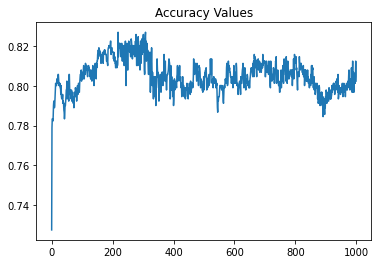

In [31]:
plot1 = plt.figure(1)
plt.plot(loss_values)
plt.title("Loss Values")
plt.show()

plot2 = plt.figure(2)
plt.plot(acc_values)
plt.title("Accuracy Values")
plt.show()

In [32]:
def predict(data):
    HasilPredict = []
    for i in data:
      # Hidden Layer1
      o_hidden1 = np.matmul(i, w_hidden1) + b_hidden1
      o_hidden1 = sig(o_hidden1)
      # Hidden Layer2
      o_hidden2 = np.matmul(o_hidden1, w_hidden2) + b_hidden2
      o_hidden2 = sig(o_hidden2)
      # Outpur Layer
      o_output  = np.matmul(o_hidden2, w_output) + b_output
      o_output  = sig(o_output)
      HasilPredict.append(round(float(o_output)))
    return HasilPredict

In [33]:
prediksi = predict([x_train[4]])
print(prediksi)
#e is 0
#p is 1
for i in prediksi :
  if i == 1 :
    print('Result : 1')
  elif i == 0 :
    print('Result : 0')

[0]
Result : 0


In [34]:
data_train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Embarked  
0        0         A/5 21171   7.2500        S  
1        0          PC 17599  71.2833        C  
2        0  STON/O2. 3101282   7.9250        S  
3        0            113803  53.1000        S  
4        0            373450   8.0500        S  
..     ...               ...      ...      ...  
886      0            211536  13.0000        S  
887      0            112053  30.0000        S  
888      2        W./C. 6607  23.4500        S  
889      0            111369  30.0000        C  
890      0            370376   7.7500        Q  

[891 rows x 11 columns]

In [45]:
# GUI

from tkinter import *
from tkinter import ttk
import tkinter as tk
master = tk.Tk()
n      = tk.IntVar()
Main   = Tk()
data_  = []

tk.Label(master,text="Sex", font=("Times",12)).grid(row=2)
tk.Label(master,text="Age", font=("Times",12)).grid(row=3)
tk.Label(master,text="SibSp", font=("Times",12)).grid(row=4)
tk.Label(master,text="Parch", font=("Times",12)).grid(row=5)
tk.Label(master,text="Fare", font=("Times",12)).grid(row=6)
tk.Label(master,text="Embarked", font=("Times",12)).grid(row=7)

e1 = ttk.Combobox(master, width = 17, textvariable = n, font=("Times",12))
e1['values'] = (int(0), int(1))
e2 = tk.Entry(master, font=("Times",12))
e3 = tk.Entry(master, font=("Times",12))
e4 = tk.Entry(master, font=("Times",12))
e5 = tk.Entry(master, font=("Times",12))
e6 = tk.Entry(master, font=("Times",12))
  
e1.grid(column = 1, row = 2)
e1.current()
e2.grid(row=3, column=1)
e3.grid(row=4, column=1)
e4.grid(row=5, column=1)
e5.grid(row=6, column=1)
e6.grid(row=7, column=1)

e1 = int(float(e1.get()))-minn[0]/(maxx[0]-minn[0])
e2 = e2.get()-minn[1]/(maxx[1]-minn[1])
e3 = e3.get()-minn[2]/(maxx[2]-minn[2])
e4 = e4.get()-minn[3]/(maxx[3]-minn[3])
e5 = e5.get()-minn[4]/(maxx[4]-minn[4])
e6 = e6.get()-minn[5]/(maxx[5]-minn[5])
data_.append(e1)
data_.append(e2)
data_.append(e3)
data_.append(e4)
data_.append(e5)
data_.append(e6)
def _predict_(data):
    HasilPredict = []
    for i in data:
        # Hidden Layer1
        o_hidden1 = np.matmul(i, w_hidden1) + b_hidden1
        o_hidden1 = sig(o_hidden1)
        # Hidden Layer2
        o_hidden2 = np.matmul(o_hidden1, w_hidden2) + b_hidden2
        o_hidden2 = sig(o_hidden2)
        # Outpur Layer
        o_output  = np.matmul(o_hidden2, w_output) + b_output
        o_output  = sig(o_output)
        HasilPredict.append(round(float(o_output)))
    for i in HasilPredict :
        if i == 1 :
            a = 'Result : 1'
        elif i == 0 :
            a = 'Result : 0'
        tk.Label(master,text=a, font=("Times",12)).grid(row=9)
    return HasilPredict

tk.Button(master, 
          text='Predict',command=_predict_(data_),font=("Times",12) ).grid(row=8, 
                                column=1, 
                                sticky=tk.W, 
                                pady=8)


master.geometry('500x500')
master.mainloop()

ValueError: could not convert string to float: 

In [59]:
from tkinter import *
from tkinter.ttk import Combobox
from tkinter import messagebox


class Test:
    def __init__(self, tk):
        self.var = StringVar()
        self.data = (0, 1)
        self.lb0 = Label(tk,  text = 'MULTILAYER PERCEPTRON PREDIKSI KESELAMATAN PENUMPANG TITANIC',
                         font = ("Times",12)).place(x=15,y=0)
        self.lb1 = Label(tk,  text = 'Sex',font = ("Times",9)).place(x=5,y=50)
        self.lb2 = Label(tk,  text = 'Age',font = ("Times",9)).place(x=5,y=75)
        self.lb3 = Label(tk,  text = 'SibSp',font = ("Times",9)).place(x=5,y=100)
        self.lb4 = Label(tk,  text = 'Parch',font = ("Times",9)).place(x=5,y=125)
        self.lb5 = Label(tk,  text = 'Fare',font = ("Times",9)).place(x=5,y=150)
        self.lb6 = Label(tk,  text = 'Embarked',font = ("Times",9)).place(x=5,y=175)
        #---------------------------------------------------------------------------------------------
        self.cb1 = Combobox(tk, values=self.data,font = ("Times",9), width=17)
        self.cb1.place(x=80, y=50)
        self.e2  = Entry(tk,font = ("Times",9) ).place(x=80,y=75)
        self.e3  = Entry(tk,font = ("Times",9) ).place(x=80,y=100)
        self.e4  = Entry(tk,font = ("Times",9) ).place(x=80,y=125)
        self.e5  = Entry(tk,font = ("Times",9) ).place(x=80,y=150)
        self.e6  = Entry(tk,font = ("Times",9) ).place(x=80,y=175)
        #---------------------------------------------------------------------------------------------
        self.b1  = Button(tk, text="Prediksi", command=self.select).place(x=300, y=250, anchor=CENTER)
        
    def select(self):
        data   = []
        value1 = self.cb1.get()
        #messagebox.showinfo("Warn", "You selected " + value)
        value2 = self.e2.get()
        value3 = self.e3.get()
        value4 = self.e4.get()
        value5 = self.e5.get()
        value6 = self.e6.get()
        


tk = Tk()
tk.geometry("600x300")
tk.title("MULTILAYER PERCEPTRON")
tt = Test(tk)
tk.mainloop()